## Advanced Lane Lines Project

### 1. Camera Calibration

There are two types of distortion that can be introduced by a camera:
1. Radial distortion: light bends a little TOO MUCH or TOO LITTLE at the edge of lenses.
2. Tangential distortion: camera's lense is not aligned perfectly parallel to the imaging plane.

In order to correct distortion, we need to calculate the correct camera matrix and distortion coefficients. This can be done by using the calibration chessboard (9x6) images.

After the matrix and coeeficients are calculated, we gonna use them to undistort an image to demonstrate their correctness. 

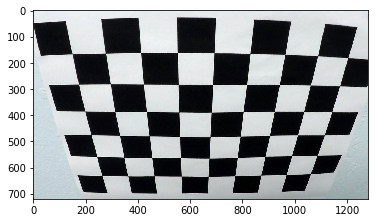

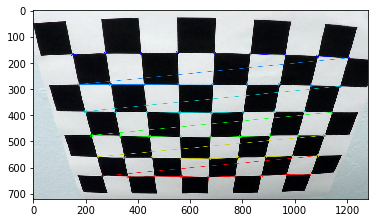

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

nx = 9
ny = 6

# Read in an image
file = './camera_cal/calibration2.jpg'
image = cv2.imread(file)
plt.imshow(image)
plt.show()

# Find the corners in the chessboard
ret, corners = cv2.findChessboardCorners(image, (nx, ny), None)
if ret:
    # If found, draw chessboard corners
    out = cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
    plt.imshow(out)
    plt.show()

Read all calibration images, calculate matrix and distortion coefficients and display the undistortion images.

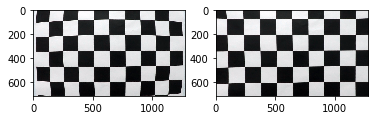

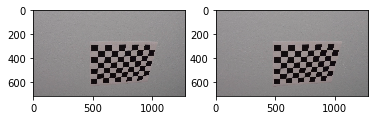

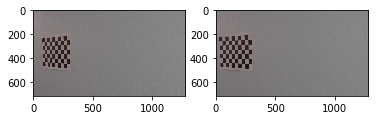

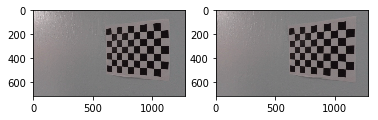

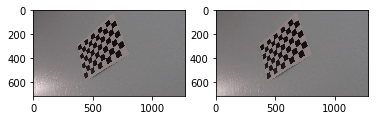

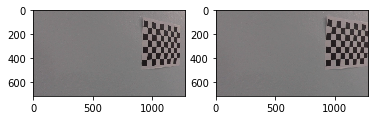

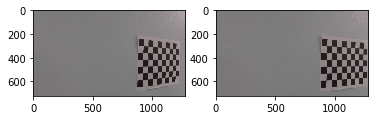

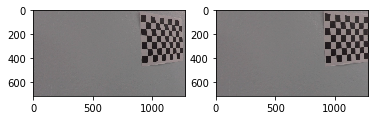

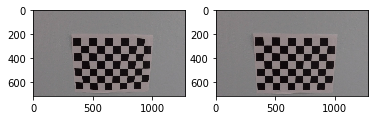

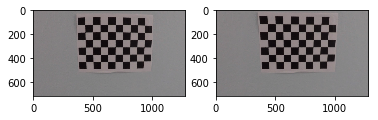

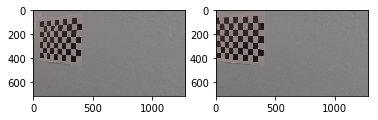

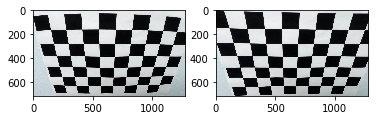

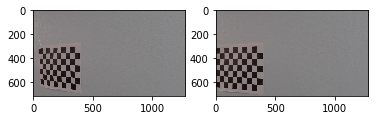

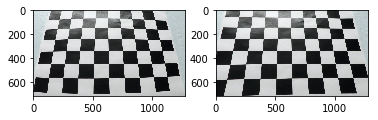

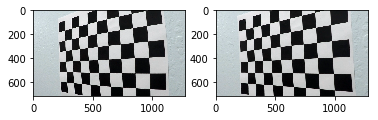

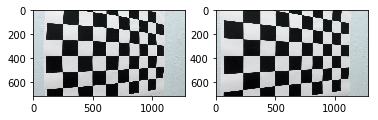

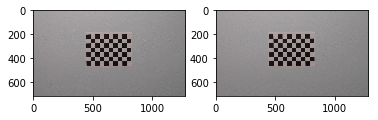

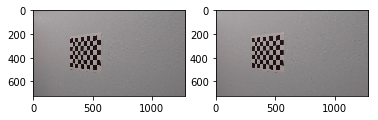

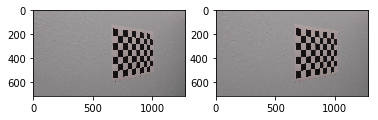

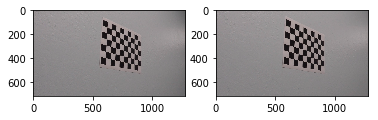

In [29]:
import glob

nx = 9
ny = 6

objpoints = []
imgpoints = []

# Generate object point
objp = np.zeros((nx*ny, 3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2) # x,y coordinates

files = glob.glob('./camera_cal/calibration*.jpg')

for file in files:
    image = cv2.imread(file)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    if ret:
        imgpoints.append(corners)
        objpoints.append(objp)

# Calibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image.shape[0:2], None, None)
for file in files:
    image = cv2.imread(file)
    undistort_img = cv2.undistort(image, mtx, dist, None, mtx)
    fig = plt.figure()
    fig.add_subplot(1,2,1)
    plt.imshow(image)
    fig.add_subplot(1,2,2)
    plt.imshow(undistort_img)
    plt.show()

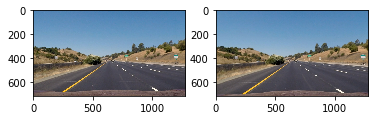

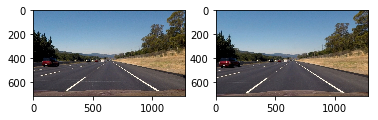

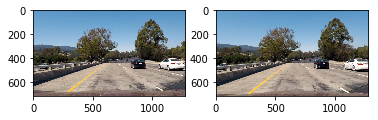

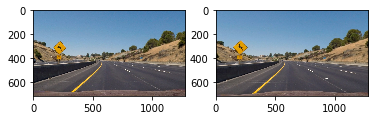

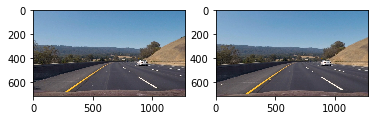

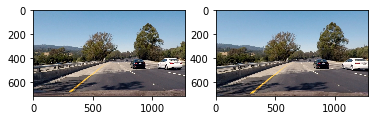

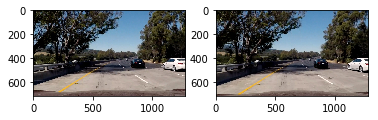

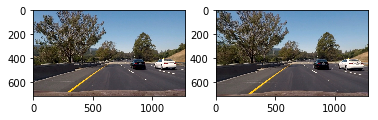

In [33]:
# Apply matrix to test images

images = []
files = glob.glob('./test_images/*.jpg')
for file in files:
    image = mpimg.imread(file)
    undistort_img = cv2.undistort(image, mtx, dist, None, mtx)
    fig = plt.figure()
    fig.add_subplot(1,2,1)
    plt.imshow(image)
    fig.add_subplot(1,2,2)
    plt.imshow(undistort_img)
    plt.show()
    images.append(undistort_img)

### 2. Create Threshold Binary Images

Use various technologies (e.g. color space transforms and Sobel gradients) to create binary images containing lane pixels.

Firstly, let's take an image and compare the performance of each channel in HLS and HSV color space:

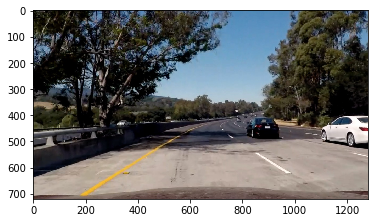

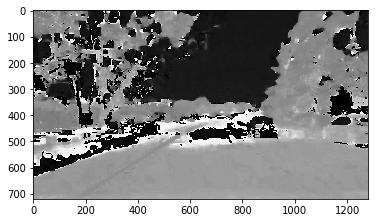

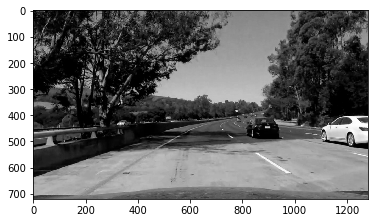

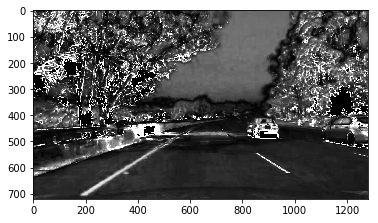

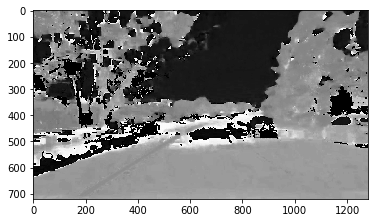

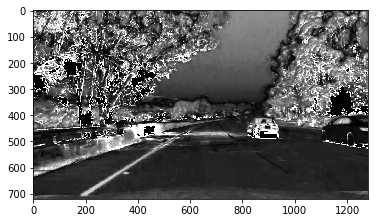

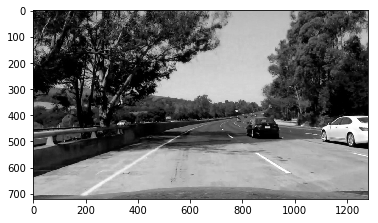

In [45]:
img = images[6]

plt.imshow(img)
plt.show()

hls_img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
for i in range(3):
    plt.imshow(hls_img[:,:,i], cmap='gray')
    plt.show()
    
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
for i in range(3):
    plt.imshow(hsv_img[:,:,i], cmap='gray')
    plt.show()

After visually checked all test images, I found S channel in HLS color space output a stable and better result. 

Then let's take a look at the gradient method. I use Sobel gradient and want to check the binary image of these 4 operations: sobel-x, sobel-y, sobel magnitude, sobel direction.